<a href="https://colab.research.google.com/github/symaeng98/Artificial_Intelligence/blob/main/MultipleRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()
print(perch_full)

In [ ]:
import numpy as np
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    perch_full, perch_weight, random_state = 42
)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures() 
poly.fit([[2,3]]) #fit()은 새롭게 만들 특성 조합을 찾고
print(poly.transform([[2,3]])) #transform()은 실제로 데이터를 변환한다.

[[1. 2. 3. 4. 6. 9.]]


PolynomialFeatures는 기본적으로 **각 특성을 제곱한 항**과 **특성끼리 곱한 항**을 추가한다.
그렇다면 1은 왜 추가되었을까?

*무게* = *a* * *길이* + *b* * *높이* + *c* * *두께* + *d* * *1*

위 식에서 선형 방정식의 절편은 항상 값이 1인 특성과 곱해지는 계수라고 볼 수 있다. 이렇게 보면 특성은 (길이, 높이, 두께, 1)이 된다. 사이킷런의 선형 모델은 자동으로 절편을 추가하므로 굳이 이렇게 특성을 만들 필요가 없으므로 include_bias = false로 지정하여 특성을 변환하자

In [ ]:
poly = PolynomialFeatures(include_bias=False) 
poly.fit(train_input) 
train_poly = poly.transform(train_input)
print(train_poly.shape)

(42, 9)


In [ ]:
poly.get_feature_names() #특성이 어떤 조합으로 이루어졌는지 확인하게 해주는 매서드이다

['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [ ]:
test_poly = poly.transform(test_input)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly,train_target))
#농어의 길이, 높이, 두께와 각 특성의 제곱, 특성끼리 곱한 값 모두를 사용하니 점수가 높게 나온다.

0.9903183436982124


In [ ]:
print(lr.score(test_poly,test_target))

0.9714559911594132


In [ ]:
poly = PolynomialFeatures(degree=5, include_bias=False) #degree를 이용해서 특성을 3제곱, 4제곱 등 고차항의 최대 차수를 지정할 수 있다.
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 55)


In [ ]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly,train_target))

0.9999999999991096


In [ ]:
print(lr.score(test_poly,test_target)) #특성의 개수를 크게 늘리면 훈련 세트에 대해 거의 완벽하게 학습하지만, 훈련세트에 너무 과대적합되어 테스트 세트에서는 낮은 점수가 나온다.

-144.40579242335605


**규제**는 머신러닝 모델이 훈련 세트를 너무 과도하게 학습하지 못하도록 훼방하는 것을 말한다. 즉 모델이 훈련세트에 과대적합되지 않도록 해준다. 선형 회귀 모델의 경우 특성에 곱해지는 계수의 크기를 작게 만드는 일이다.

특성의 스케일이 정규화되지 않으면 선형 회귀 모델에 규제를 적용할 때 공정하게 제어되지 않기 때문에 **정규화**를 해야한다. 평균과 표준편차를 직접 구해 특성을 표준점수로 바꿀 수 있지만, 이번엔 **StandardScaler** 클래스를 사용하자

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly) #꼭 훈련 세트로 학습한 변환기를 사용해 테스트 세트까지 변환해야한다.
train_scaled = ss.transform(train_poly) #표준점수로 변환한 값
test_scaled = ss.transform(test_poly)

선형 회귀 모델에 규제를 추가한 모델을 **릿지(ridge)**와 **라쏘(lasso)**라고 한다. 릿지는 **계수를 제곱한 값**을 기준으로, 라쏘는 **계수의 절댓값**을 기준으로 규제를 적용한다. 일반적으로 릿지를 조금 더 선호한다고 한다.

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

0.9896101671037343


In [ ]:
print(ridge.score(test_scaled, test_target))#특성의 개수가 많은데도 너무 과대적합되지 않고 좋은 성능을 내는 것을 보여준다.

0.9790693977615396


릿지와 라쏘 모델을 사용할 때 **alpha** 매개변수로 **규제의 양을 임의로 조절**할 수 있다. alpha 값이 크면 규제 강도가 세지므로 계수 값을 더 줄이고 조금 더 과소적합되도록 유도한다. 반대로 alpha 값이 작으면 계수를 줄이는 역할이 줄어들고 선형 회귀 모델과 유사해지므로 과대적합될 가능성이 크다.

머신러닝 모델이 학습할 수 없고 사람이 알려줘야 하는 파라미터를 **하이퍼파라미터(hyperparameter)**라고 한다. 사이킷런과 같은 머신러닝 라이브러리에서 하이퍼파라미터는 클래스와 메서드의 매개변수로 표현된다.

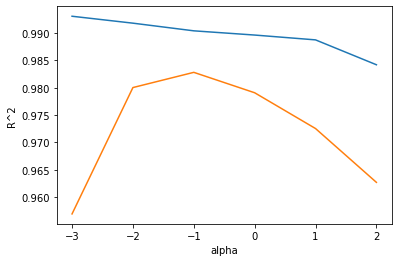

In [ ]:
import matplotlib.pyplot as plt
train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100] #alpha 값을 바꾸면서 무엇이 적합한지 확인해보자
for alpha in alpha_list:
  ridge = Ridge(alpha = alpha)
  ridge.fit(train_scaled, train_target)

  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))

plt.plot(np.log10(alpha_list),train_score)
plt.plot(np.log10(alpha_list),test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()
#alpha가 0.1일때 가장 적합하다.

In [ ]:
ridge = Ridge(alpha = 0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570366
0.9827976465386916


lasso 모델은 ridge를 lasso로 바꿔주기만 하면 된다. lasso 모델은 계수 값을 0으로 만들 수 있다고 했는데, np.sum(lasso.coef_ == 0)은 계수가 0인 값들을 반환해준다.
이처럼 라쏘 모델은 **유용한 특성을 골라내는** 용도로 자주 사용한다고 한다.

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9897898972080961
0.9800593698421883


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23364.075969939808, tolerance: 518.2793833333334
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20251.975097475122, tolerance: 518.2793833333334
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 806.2370926333242, tolerance: 518.2793833333334
  positive)


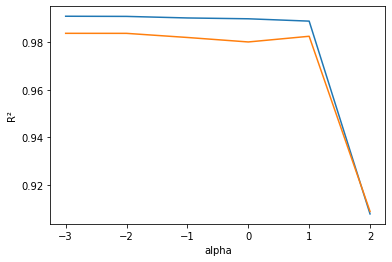

In [ ]:
train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:
  lasso = Lasso(alpha=alpha, max_iter=10000)
  lasso.fit(train_scaled, train_target)
  train_score.append(lasso.score(train_scaled, train_target))
  test_score.append(lasso.score(test_scaled, test_target))

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R²')
plt.show()

In [ ]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)

In [ ]:
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


In [ ]:
print(np.sum(lasso.coef_ == 0))

40
